In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [2]:
df = pd.read_csv('tv_shows.csv')

In [3]:
df

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [5]:
df.shape

(5611, 11)

In [6]:
df.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'type'],
      dtype='object')

In [7]:
netflix_movies = df.loc[df['Netflix']==1]
Hulu_movies = df.loc[df['Hulu']==1]
Prime_movies  = df.loc[df['Prime Video']==1]
Disney_movies = df.loc[df['Disney+']==1]


In [8]:
netflix_movies = netflix_movies.drop(['Hulu','Prime Video','Disney+'], axis = 1)
Hulu_movies = Hulu_movies.drop(['Netflix','Prime Video','Disney+'], axis = 1)
Prime_movies = Prime_movies.drop(['Hulu','Netflix','Disney+'], axis = 1)
Disney_movies = Disney_movies.drop(['Hulu','Prime Video','Netflix'], axis = 1)



# Number of movies 
## Calculating the no. of movies on each platform 

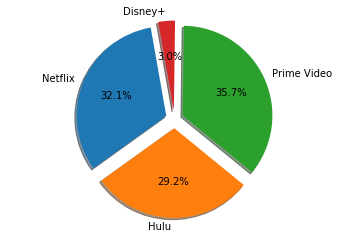

In [9]:
total_netflix_movies = len(netflix_movies.index)
total_Hulu_movies = len(Hulu_movies.index)
total_Prime_movies = len(Prime_movies.index)
total_Disney_movies = len(Disney_movies.index)

labels = 'Netflix', 'Hulu','Prime Video', 'Disney+'
sizes = [total_netflix_movies, total_Hulu_movies,
         total_Prime_movies, total_Disney_movies]
explode=(0.1,0.1,0.1,0.1)

fig1,ax1 = plt.subplots()

ax1.pie(sizes,
       explode = explode,
       labels = labels,
       autopct = '%1.1f%%',
       shadow = True,
       startangle = 100)
ax1.axis('equal')
plt.show()

## Top 20 movies 
### on Netflix with 8+ ratings on IMDb.

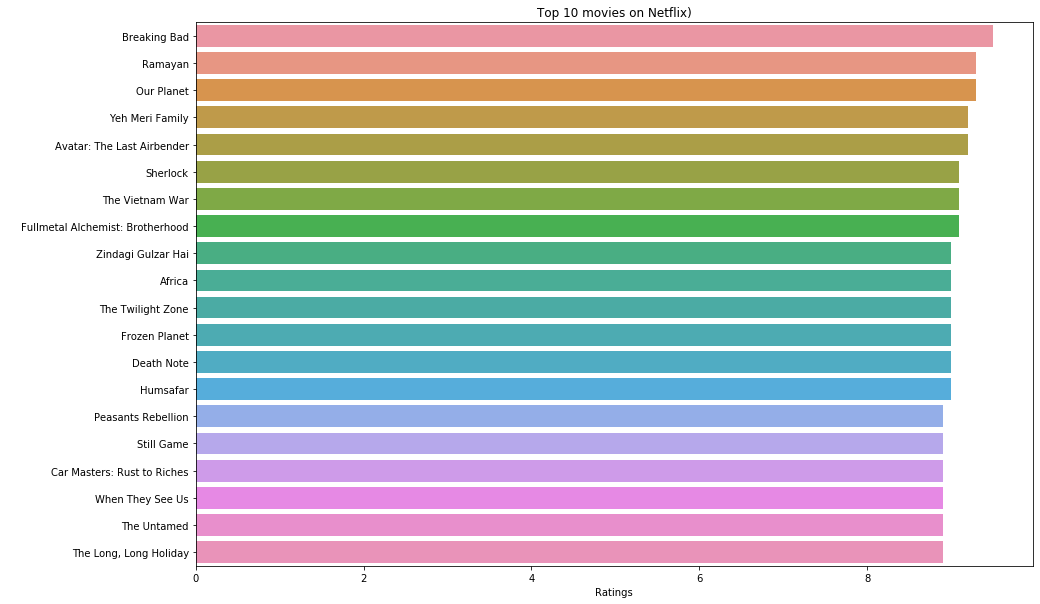

In [71]:
top_10 = netflix_movies[['Title','IMDb']]
titles = netflix_movies['Title']
top_10_movies = top_10.sort_values(by=['IMDb'],ascending = False).head(20)

plt.figure(figsize = (15,10))
sns.barplot(data= top_10_movies, x = 'IMDb',y = 'Title')
plt.xlabel('Ratings')
plt.ylabel(' ')
plt.title('Top 10 movies on Netflix)')
plt.show()

## Top 20 movies 
### on Hulu with 8+ ratings on IMDb.

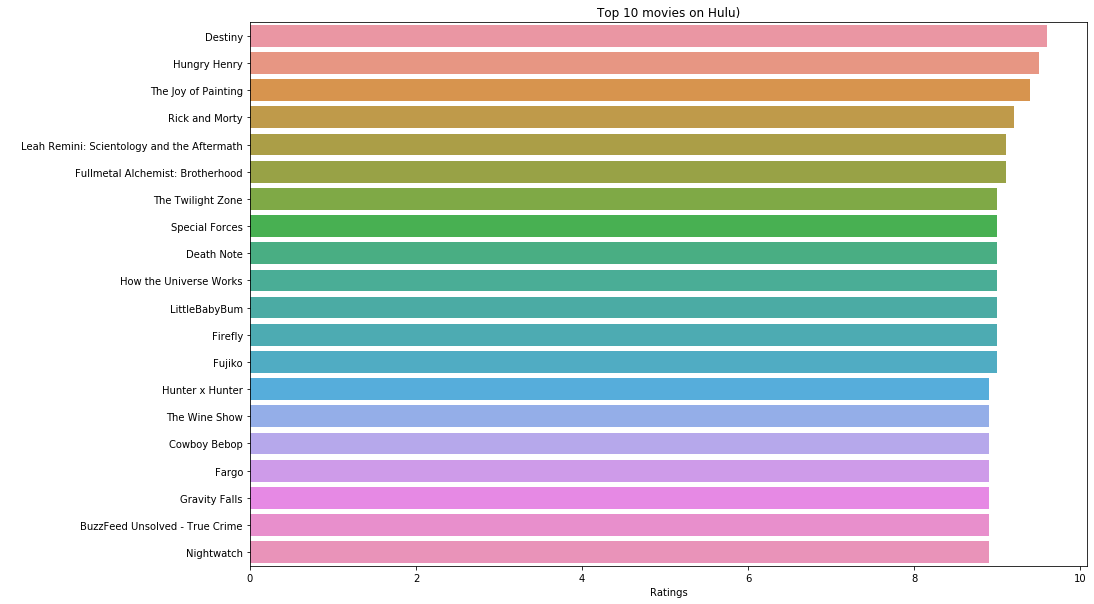

In [73]:
top_10 = Hulu_movies[['Title','IMDb']]
top_10_movies = top_10.sort_values(by=['IMDb'],ascending = False).head(20)

plt.figure(figsize = (15,10))
sns.barplot(data= top_10_movies, x = 'IMDb',y = 'Title')
plt.xlabel('Ratings')
plt.ylabel(' ')
plt.title('Top 10 movies on Hulu')
plt.show()

## Top 20 movies 
### On Prime Vedio with 8+ ratings on IMDb.

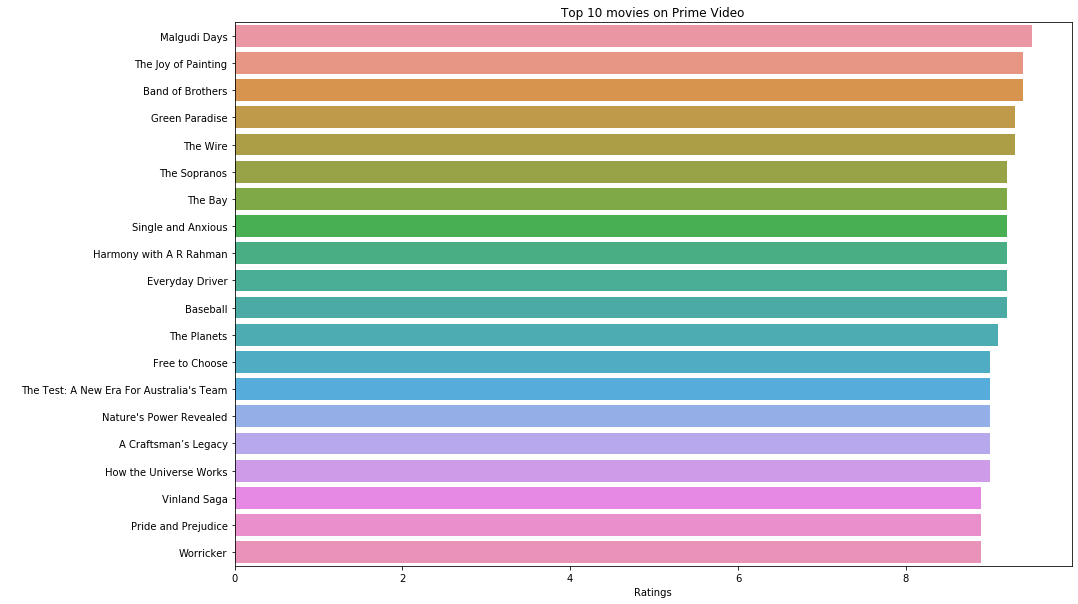

In [77]:
top_10 = Prime_movies[['Title','IMDb']]
top_10_movies = top_10.sort_values(by=['IMDb'],ascending = False).head(20)

plt.figure(figsize = (15,10))
sns.barplot(data= top_10_movies, x = 'IMDb',y = 'Title')
plt.xlabel('Ratings')
plt.ylabel(' ')
plt.title('Top 10 movies on Prime Video')
plt.show()

## Top 20 movies 
### On Disney+ with 8+ ratings on IMDb.

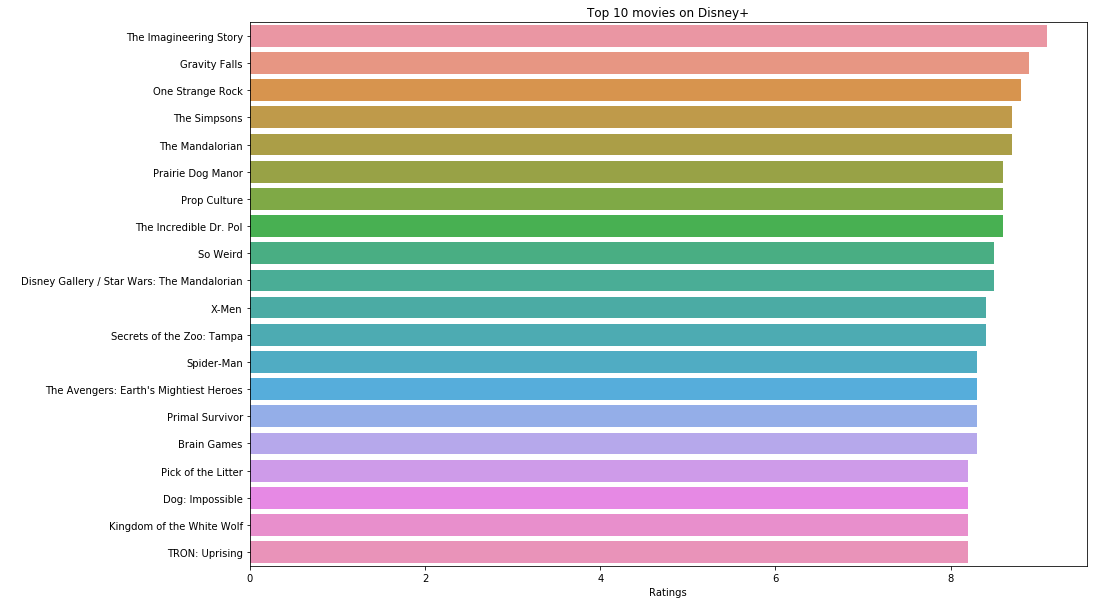

In [76]:
top_10 = Disney_movies[['Title','IMDb']]
top_10_movies = top_10.sort_values(by=['IMDb'],ascending = False).head(20)

plt.figure(figsize = (15,10))
sns.barplot(data= top_10_movies, x = 'IMDb',y = 'Title')
plt.xlabel('Ratings')
plt.ylabel(' ')
plt.title('Top 10 movies on Disney+')
plt.show()

# Finding number of movies on platfrom with more than 8+ rating

In [78]:
nextflix_popular_movies = netflix_movies['IMDb']>8
sum(nextflix_popular_movies)


383

In [79]:
hulu_popular_movies = Hulu_movies['IMDb']>8
sum(hulu_popular_movies)

279

In [80]:
prime_popular_movies = Prime_movies['IMDb']>8
sum(prime_popular_movies)

293

In [81]:
disney_popular_movies = Disney_movies['IMDb']>8
sum(disney_popular_movies)

30

In [82]:


total_movies= [sum(nextflix_popular_movies),sum(hulu_popular_movies)
            ,sum(prime_popular_movies),sum(disney_popular_movies)]
platforms= ['Netflix','Hulu','Prime Video', 'Disney+']

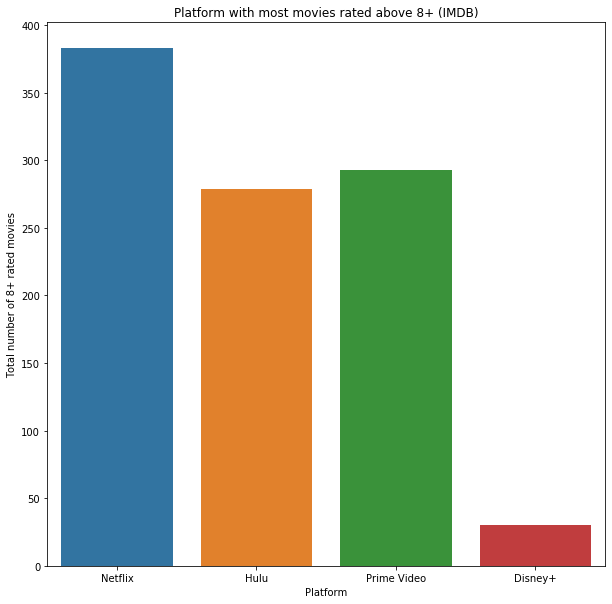

In [83]:
plt.figure(figsize = (10,10))
sns.barplot(
            x = platforms,y = total_movies)
plt.xlabel('Platform')
plt.ylabel('Total number of 8+ rated movies')
plt.title('Platform with most movies rated above 8+ (IMDB)')
plt.show()